__________________
# * FINAL PROJECT *
__________________

### TASK 1: Analysis of : Number of products, number of product vs sales, monthly/ annual sales, products sold most and sales made by new or old customers

## IMPORT LIBRARIES + DATASETS

In [2]:
import pandas as pd
import numpy as np
import warnings as ws
import plotly.graph_objs as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import unicodeit as ut

from plotly.subplots import make_subplots
pio.templates.default = "plotly_white"
pd.options.plotting.backend = "plotly"

ws.filterwarnings("ignore")

commercial_act_df = pd.read_csv("data/commercial_activity_df.csv")
commercial_act_df = commercial_act_df.rename(columns={"Unnamed: 0": "id"})

products_df = pd.read_csv("data/products_df.csv")
products_df = products_df.rename(columns={"Unnamed: 0": "id"})

socio_demo_df = pd.read_csv("data/sociodemographic_df.csv")
socio_demo_df = socio_demo_df.rename(columns={"Unnamed: 0": "id"})

## PRINT HEAD FOR ALL 3 ENTITIES

In [3]:
commercial_act_df.head(3)

,id,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO


In [4]:
products_df.head(3)

,id,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [5]:
socio_demo_df.head(3)

,id,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10
1,1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74
2,2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11


## MERGE ALL ENTITIES IN ONE FINAL DATASET

In [6]:
commercial_prod_temp = commercial_act_df.merge(products_df, on=["pk_cid","pk_partition"],how="inner")
full_commercial_temp_df = commercial_prod_temp.merge(socio_demo_df, on=["pk_cid","pk_partition"],how="inner")
full_commercial_df = full_commercial_temp_df.drop(columns={"id_x","id_y","id"})
full_commercial_df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES,0,0,0,0,...,0,0,0,1,ES,29.0,H,35,N,87218.10
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,13.0,V,23,N,35548.74
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,13.0,V,23,N,122179.11
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO,1,0,0,0,...,0,0,0,0,ES,50.0,H,22,N,119775.54
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,50.0,V,23,N,NaN


__________________
# UNIVARIATE ANALYSIS
__________________

## 1. Dataset size (in-memory size, number of registers and attributes, etc.)

In [7]:
print(f"Size of dataframe: {full_commercial_df.shape[0]}")
print(f"# unique rows: {full_commercial_df.duplicated().shape[0]}")
print(f"# unique pk_cid: {full_commercial_df['pk_cid'].nunique()}")

Size of dataframe: 5962924
# unique rows: 5962924
# unique pk_cid: 456373


## 2. Direct visualization of the data (head)

In [8]:
full_commercial_df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES,0,0,0,0,...,0,0,0,1,ES,29.0,H,35,N,87218.10
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,13.0,V,23,N,35548.74
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,13.0,V,23,N,122179.11
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO,1,0,0,0,...,0,0,0,0,ES,50.0,H,22,N,119775.54
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,0,0,0,0,...,0,0,0,1,ES,50.0,V,23,N,NaN


## 3. Type of variables available (numeric, categorical)

In [9]:
print(full_commercial_df.dtypes)

pk_cid                  int64
pk_partition           object
entry_date             object
entry_channel          object
active_customer       float64
segment                object
short_term_deposit      int64
loans                   int64
mortgage                int64
funds                   int64
securities              int64
long_term_deposit       int64
em_account_pp           int64
credit_card             int64
payroll               float64
pension_plan          float64
payroll_account         int64
emc_account             int64
debit_card              int64
em_account_p            int64
em_acount               int64
country_id             object
region_code           float64
gender                 object
age                     int64
deceased               object
salary                float64
dtype: object


## 4.  Descriptive statistics (mean values, dispersion, percentiles, etc.)

In [10]:
full_commercial_df.describe()

,pk_cid,active_customer,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,region_code,age,salary
count,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5962924.0,5.962924e+06,5.962863e+06,5.962863e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.960660e+06,5.962924e+06,4.450821e+06
mean,1.234930e+06,4.033845e-01,2.581619e-03,7.848498e-05,5.433576e-05,3.370662e-03,3.711770e-03,1.688098e-02,0.0,1.188444e-02,3.451144e-02,3.652641e-02,5.524471e-02,5.483233e-02,9.441140e-02,5.701901e-06,7.348076e-01,2.581440e+01,2.976042e+01,1.158167e+05
std,1.623020e+05,4.905767e-01,5.074401e-02,8.858828e-03,7.371080e-03,5.795948e-02,6.081113e-02,1.288255e-01,0.0,1.083660e-01,1.825388e-01,1.875960e-01,2.284573e-01,2.276527e-01,2.924002e-01,2.387859e-03,4.414356e-01,1.359566e+01,1.198038e+01,1.995519e+05
min,1.589100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.202730e+03
25%,1.112532e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,2.200000e+01,6.150063e+04
50%,1.231097e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.800000e+01,2.500000e+01,8.865465e+04
75%,1.352339e+06,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.600000e+01,3.400000e+01,1.316699e+05
max,1.553689e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.200000e+01,1.050000e+02,2.889440e+07


In [11]:
full_commercial_df.describe(include='object')

,pk_partition,entry_date,entry_channel,segment,country_id,gender,deceased
count,5962924,5962924,5829891,5828980,5962924,5962899,5962924
unique,17,1499,68,3,41,2,2
top,2019-05-28,2017-07-28,KHE,03 - UNIVERSITARIO,ES,H,N
freq,442995,57389,3113947,3900166,5960672,3087502,5961849


## 5.  Number of null values 

In [12]:
df_nulls=pd.DataFrame(full_commercial_df.isna().any())
size_=full_commercial_df.shape[0]*100

null_count_df=pd.DataFrame(columns = ['Field', 'Counting', 'Percentage'])

for idx, row in df_nulls.iterrows():
    if df_nulls.loc[idx].values[0]:
        n_=full_commercial_df[full_commercial_df[idx].isna()].shape[0]
        null_count_df.loc[len(null_count_df.index)] = [idx, n_, round(n_/size_*100,2)]  

null_count_df.head(10)


,Field,Counting,Percentage
0,entry_channel,133033,0.02
1,segment,133944,0.02
2,payroll,61,0.00
3,pension_plan,61,0.00
4,region_code,2264,0.00
5,gender,25,0.00
6,salary,1512103,0.25


## 6.  Distribution / range of target values (only in supervised classification)

In [13]:
# To be developed

__________________
# MULTIVARIATE ANALYSIS
__________________

## 1.  Distribution of variables 2 to 2 (scatter-plots)

### 1.1  Boxplots Numeric vs Numeric

In [14]:
def show_boxplots(df):

    for col in df.loc[:, ~df.columns.isin(['pk_cid','region_code'])].select_dtypes(include=np.number):
        
        plt.figure(figsize=(15,6))
        sns.boxplot(data=df[col])
        plt.title(str(col))
        plt.show()

#show_boxplots(full_commercial_df)

### 1.2  Barcharts Categorical

In [15]:
def show_frequency_plots(df):

    df_cat = df[["entry_channel","segment","country_id",'region_code','gender','deceased']]

    for col in df_cat:
        data = pd.crosstab(df_cat[col], "Count").sort_values(by="Count", ascending=False).reset_index().head(20)
        fig = px.bar(data_frame=data, x=data[col], y=data["Count"], text=data["Count"])
        fig.update_layout(
                    title={
                    'text' : str(col),
                    'x':0.5,
                    'xanchor': 'center'
                })
        fig.update_layout(
            font_family="Courier New",
            title_font_family="Courier New",

        )
        fig.update_xaxes(title_font_family="Courier New", title_font_size=20)
        fig.update_yaxes(title_font_family="Courier New", title_font_size=20)
        fig.update_traces(textfont_size=16, textangle=0, textposition="outside", cliponaxis=False, hovertemplate="%{text}<br>%{x}")

        fig.show()
    
    
#show_frequency_plots(full_commercial_df)

### 1.3 Barcharts Categorical vs Categorical

In [16]:
"""['pk_cid', 'pk_partition', 'entry_date', 'entry_channel', 'active_customer', 'segment', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account','emc_account', 'debit_card', 'em_account_p', 'em_acount', 'country_id','region_code', 'gender', 'age', 'deceased', 'salary']"""

def plot_cat_vs_cat(x, y,df, norm=True, cutoff_count_x=10):
    p_df = (
        df[["pk_cid", x, y]]
        .dropna(how="any", axis=0)
        .pivot_table(index=y, columns=x, values="pk_cid", aggfunc="count")
    )
    p_df = p_df.loc[:, p_df.sum(axis=0) > cutoff_count_x]
    if norm:
        p_df = p_df.div(p_df.sum(axis=0), axis=1) * 100
    
    fig = go.Figure(
        data=[
            go.Bar(
                x=p_df.columns,
                y=p_df.loc[cat],
                name=str(cat),
                showlegend=True
            )
            for cat in np.sort(p_df.index)
        ],
        layout=go.Layout(
            title="{} vs {}".format(y, x),
            barmode="stack"
        )
    )
    fig.show()

boxplots_xs = ["entry_channel","segment","active_customer","short_term_deposit","loans","pension_plan"]
#boxplots_xs = ["entry_channel","segment","mortgage","funds","securities","payroll"]
#boxplots_xs = ["entry_channel","segment","long_term_deposit","em_account_pp","credit_card","payroll_account"]
#boxplots_xs = ["entry_channel","segment","emc_account","debit_card","em_account_p","em_acount"]
#boxplots_xs = ["entry_channel","segment","country_id","region_code","gender","deceased"]
"""for x in boxplots_xs:
    for y in boxplots_xs:
        if y != x:
            plot_cat_vs_cat(x, y, full_commercial_df, norm=True, cutoff_count_x=10)
"""

'for x in boxplots_xs:\n    for y in boxplots_xs:\n        if y != x:\n            plot_cat_vs_cat(x, y, full_commercial_df, norm=True, cutoff_count_x=10)\n'

### 1.4 Boxplot Categorical vs Numeric

In [17]:
"""['pk_cid', 'pk_partition', 'entry_date', 'entry_channel', 'active_customer', 'segment', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account','emc_account', 'debit_card', 'em_account_p', 'em_acount', 'country_id','region_code', 'gender', 'age', 'deceased', 'salary']"""

def plot_box_by_cat(x, y, df, norm=True, cutoff_count_x=10):
    fig = go.Figure(
        data=[
            go.Box(
                y=df.loc[df[x] == xval, y],
                name=str(xval),
                showlegend=False
            )
            for xval in np.sort(df[x].dropna().unique())
            if (df[x] == xval).sum() > cutoff_count_x
        ],
        layout=go.Layout(
            title="{} vs {}".format(y, x)
        )
    )
    fig.show()

boxplots_xs = ["active_customer","short_term_deposit","loans","mortgage","funds","em_acount"]
boxplots_xs = ["active_customer"]
#boxplots_xs = ["securities","long_term_deposit","em_account_pp","credit_card","payroll"]
#boxplots_xs = ["pension_plan","payroll_account","emc_account","debit_card","em_account_p"]
boxplots_ys = ["age","salary"] 
"""for x in boxplots_xs:
    for y in boxplots_ys:
        if y != x:
            plot_box_by_cat(x, y, full_commercial_df, norm=True, cutoff_count_x=10)
            """


'for x in boxplots_xs:\n    for y in boxplots_ys:\n        if y != x:\n            plot_box_by_cat(x, y, full_commercial_df, norm=True, cutoff_count_x=10)\n            '

## 2. Correlation between variables 2 to 2 (linear correlation)

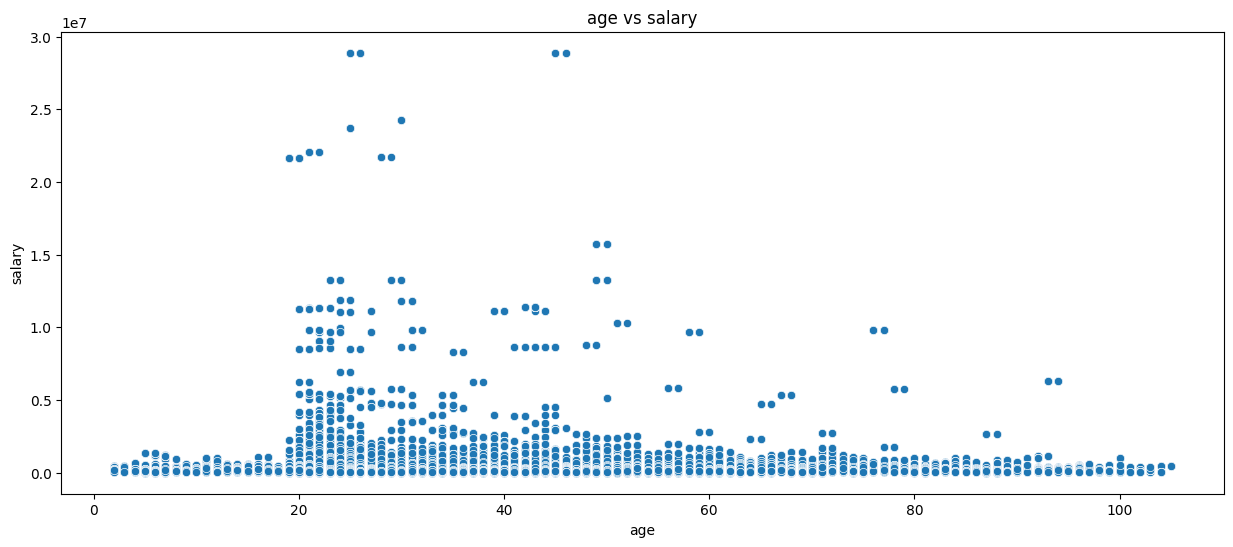

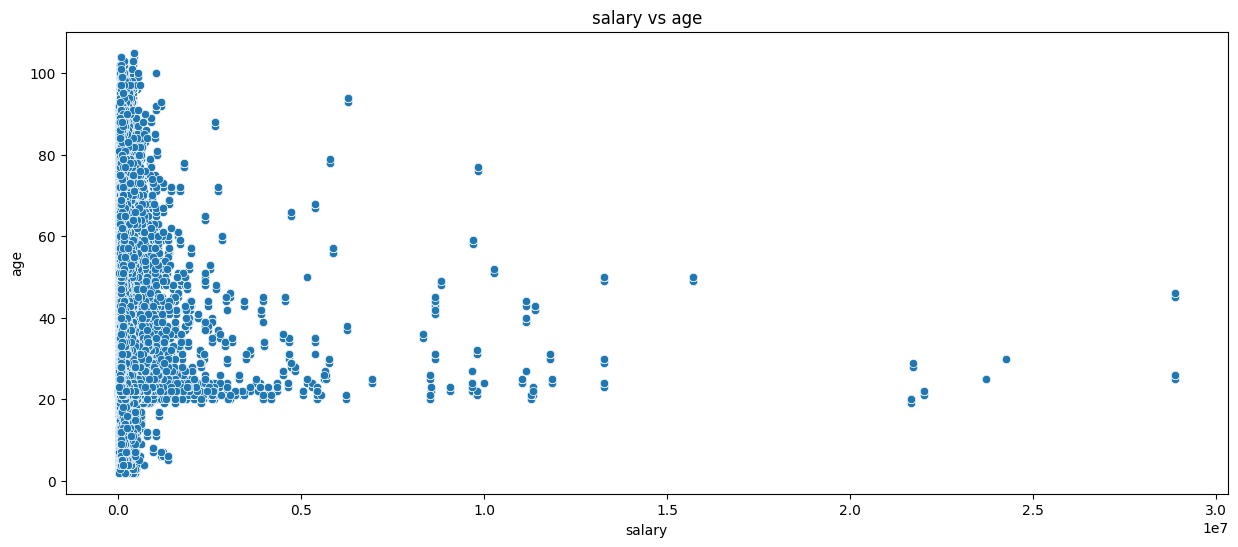

In [18]:
linear_corr_df = full_commercial_df.loc[:, ~full_commercial_df.columns.isin(['pk_cid','region_code'])].select_dtypes(include=np.number)

def show_scatters(df, x_, y_):

        plt.figure(figsize=(15,6))
        sns.scatterplot(data=df,x=x_,y=y_)
        plt.title(str(x_)+ " vs " + str(y_))
        plt.show()

for x in ["age","salary"]:
    for y in ["age","salary"]:
        if y != x:
         show_scatters(linear_corr_df, x, y)

## 3. Cross-tabs

In [19]:
"""['pk_cid', 'pk_partition', 'entry_date', 'entry_channel', 'active_customer', 'segment', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account','emc_account', 'debit_card', 'em_account_p', 'em_acount', 'country_id','region_code', 'gender', 'age', 'deceased', 'salary']"""

def show_cross_tabs(x,y):      
       n_t = full_commercial_df.shape[0]
       table_=full_commercial_df[[x,y]].groupby([x], as_index=False).value_counts(dropna=False)
       table_["percentage"]=round(table_["count"]/n_t*100,2)
       print(table_)

xs = ['entry_channel', 'active_customer', 'segment', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account','emc_account', 'debit_card', 'em_account_p', 'em_acount', 'region_code', 'gender', 'deceased']
xs = ['active_customer', 'segment', 'short_term_deposit', 'loans']
ys = xs.copy()

"""for x in xs:
    for y in ys:
        if y != x:
         show_cross_tabs(x, y)"""


'for x in xs:\n    for y in ys:\n        if y != x:\n         show_cross_tabs(x, y)'

## 4.  Correlations between combinations of variables and the class

In [20]:
# To do later

## 5.  Identification of outliers

### 5.1  Find values for mean+/-(2)sd

In [21]:
df_outliers = full_commercial_df.loc[:, ~full_commercial_df.columns.isin(['pk_cid','pk_partition','region_code'])].select_dtypes(include=np.number)

statistics_all = df_outliers.describe().T
statistics_outliers = statistics_all[['mean','25%','50%','75%']]

statistics_outliers["severe_low"] = statistics_all["25%"]-3*(statistics_all["75%"]-statistics_all["25%"])
statistics_outliers["moderate_low"] = statistics_all["25%"]-1.5*(statistics_all["75%"]-statistics_all["25%"])
statistics_outliers["moderate_high"] = statistics_all["75%"]+1.5*(statistics_all["75%"]-statistics_all["25%"])
statistics_outliers["severe_high"] = statistics_all["75%"]+3*(statistics_all["75%"]-statistics_all["25%"])

count_outliers = pd.DataFrame(index=[statistics_outliers.index],columns=["n_severe_low","n_moderate_low","normal","n_moderate_high","n_severe_high","n_na"])
count_outliers = count_outliers.fillna(0)

for col in df_outliers:
    count_outliers.loc[col,"n_severe_low"] = df_outliers[df_outliers[col]<statistics_outliers.loc[col]["severe_low"]].shape[0]
    count_outliers.loc[col,"n_moderate_low"] = df_outliers[(df_outliers[col]>=statistics_outliers.loc[col]["severe_low"]) & (df_outliers[col]<statistics_outliers.loc[col]["moderate_low"])].shape[0]
    count_outliers.loc[col,"normal"] = df_outliers[(df_outliers[col]>=statistics_outliers.loc[col]["moderate_low"]) & (df_outliers[col]<statistics_outliers.loc[col]["moderate_high"])].shape[0]
    count_outliers.loc[col,"n_moderate_high"] = df_outliers[(df_outliers[col]>=statistics_outliers.loc[col]["moderate_high"]) & (df_outliers[col]<statistics_outliers.loc[col]["severe_high"])].shape[0]
    count_outliers.loc[col,"n_severe_high"] = df_outliers[(df_outliers[col]>statistics_outliers.loc[col]["severe_high"]) ].shape[0]
    count_outliers.loc[col,"n_na"] = df_outliers.shape[0]-count_outliers.loc[col,:].values.sum()

count_outliers.head(30)

,n_severe_low,n_moderate_low,normal,n_moderate_high,n_severe_high,n_na
active_customer,0,0,5962924,0,0,0
short_term_deposit,0,0,0,0,15394,5947530
loans,0,0,0,0,468,5962456
mortgage,0,0,0,0,324,5962600
funds,0,0,0,0,20099,5942825
securities,0,0,0,0,22133,5940791
long_term_deposit,0,0,0,0,100660,5862264
em_account_pp,0,0,0,0,0,5962924
credit_card,0,0,0,0,70866,5892058
payroll,0,0,0,0,205787,5757137


### 5.2  Plot outliers + scatter plots

In [22]:
# Scatter plots:

def plot_scatter_outliers(x,y,df,bounds):
    fig = go.Figure(
        data=[
            go.Scatter(
                x=df[x],
                y=df[y],
                mode="markers"
            )
        ],
        layout=go.Layout(
            title="{} vs {}".format(y, x),
            xaxis={"title": x},
            yaxis={"title": y}
        )
    )
    if bounds.loc[y][0] >= df[y].min():
        fig.add_hline( # from y
            y=bounds.loc[y][0],
            line_color="red"
        )
    fig.add_hline( # from y
        y=bounds.loc[y][1],
        line_color="orange"
    )
    fig.add_hline( # from y
        y=bounds.loc[y][2],
        line_color="orange"
    )
    if bounds.loc[y][3] <= df[y].max():
        fig.add_hline( # from y
            y=bounds.loc[y][3],
            line_color="red"
        )
    if bounds.loc[x][0] >= df[x].min():
        fig.add_vline( # from x
            x=bounds.loc[x][0],
            line_color="red"
        )
    fig.add_vline( # from x
        x=bounds.loc[x][1],
        line_color="orange"
    )
    fig.add_vline( # from x
        x=bounds.loc[x][2],
        line_color="orange"
    )
    if bounds.loc[x][3] <= df[x].max():
        fig.add_vline( # from x
            x=bounds.loc[x][3],
            line_color="red"
        )
    fig.show()


def plot_cat_vs_cat(x, y, df, norm=True, cutoff_count_x=10):
    p_df = (
        df[["id", x, y]]
        .dropna(how="any", axis=0)
        .pivot_table(index=y, columns=x, values="id", aggfunc="count")
    )
    p_df = p_df.loc[:, p_df.sum(axis=0) > cutoff_count_x]
    if norm:
        p_df = p_df.div(p_df.sum(axis=0), axis=1) * 100
    
    fig = go.Figure(
        data=[
            go.Bar(
                x=p_df.columns,
                y=p_df.loc[cat],
                name=str(cat),
                showlegend=True
            )
            for cat in np.sort(p_df.index)
        ],
        layout=go.Layout(
            title="{} vs {}".format(y, x),
            barmode="stack"
        )
    )
    fig.show()

"""['pk_cid', 'pk_partition', 'entry_date', 'entry_channel', 'active_customer', 'segment', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account','emc_account', 'debit_card', 'em_account_p', 'em_acount', 'country_id','region_code', 'gender', 'age', 'deceased', 'salary']"""

bounds = statistics_outliers[["severe_low","moderate_low","moderate_high","severe_high"]].loc[["salary","age"]]
bivar_cols_num =["salary","age"] 

"""for i in range(len(bivar_cols_num)-1):
    for j in range(i+1, len(bivar_cols_num)):
        plot_scatter_outliers(bivar_cols_num[i],bivar_cols_num[j], full_commercial_df, bounds)"""

'for i in range(len(bivar_cols_num)-1):\n    for j in range(i+1, len(bivar_cols_num)):\n        plot_scatter_outliers(bivar_cols_num[i],bivar_cols_num[j], full_commercial_df, bounds)'